In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


Collect the data

In [53]:
# loading the csv data to Pandas DataFrame
customer_data = pd.read_csv('data/customer_churn_dataset.csv')

In [54]:
# print the first 5 rows of the dataset
customer_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [55]:
# print last 5 rows of the dataset
customer_data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [56]:
# number of rows and columns in the dataset
customer_data.shape

(64374, 12)

Explore the data


In [57]:
# getting some info about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [58]:
customer_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [59]:
customer_data['Churn'].isna().sum()

np.int64(0)

<Axes: xlabel='Churn', ylabel='Age'>

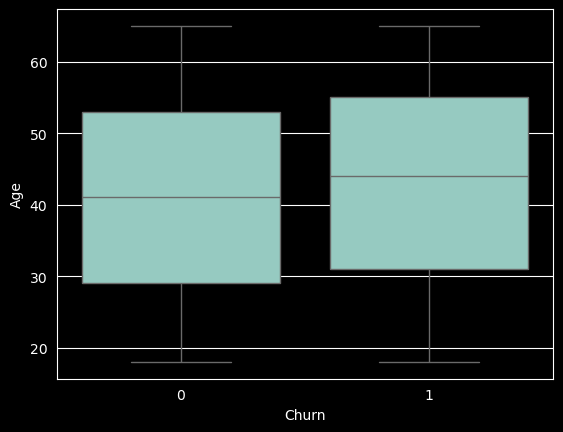

In [60]:
sns.boxplot(data = customer_data,x ='Churn',y='Age')

<Axes: xlabel='Churn', ylabel='Payment Delay'>

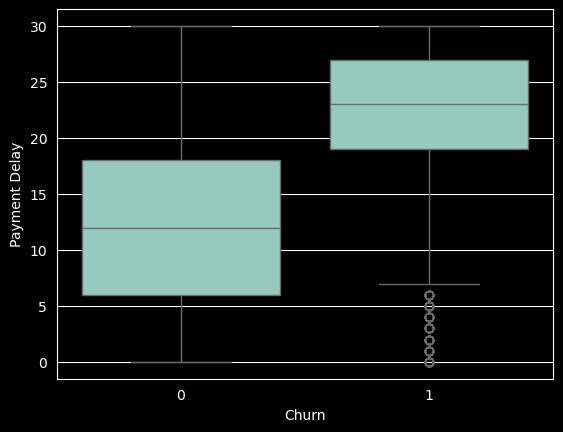

In [61]:
sns.boxplot(data=customer_data,x='Churn',y='Payment Delay')

<Axes: xlabel='Churn', ylabel='Support Calls'>

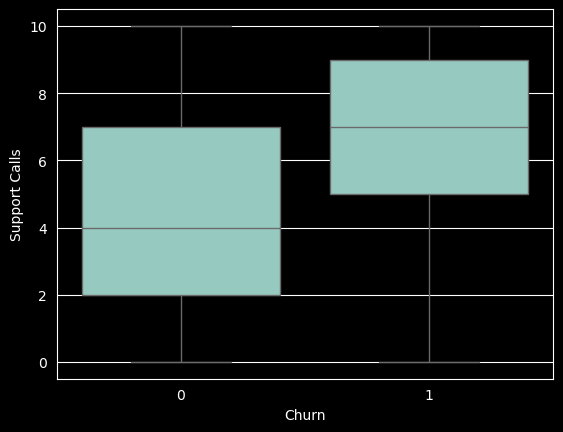

In [62]:
sns.boxplot(data = customer_data, x = 'Churn', y = 'Support Calls')

<Axes: xlabel='Churn', ylabel='Gender_numeric'>

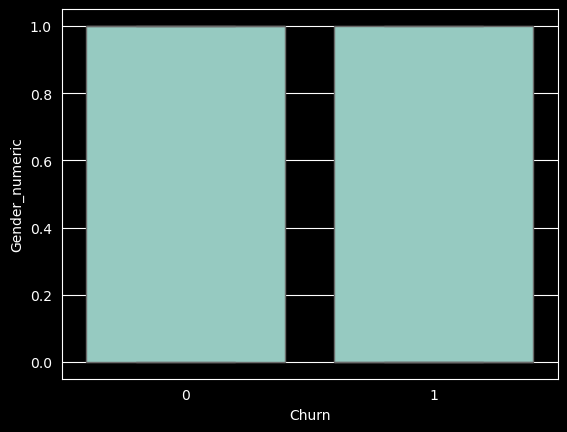

In [63]:
customer_data['Gender_numeric'] = customer_data['Gender'].map({'Female': 0, 'Male': 1})

# Boxplot
sns.boxplot(data=customer_data, x='Churn', y='Gender_numeric')


<Axes: xlabel='Churn', ylabel='Total Spend'>

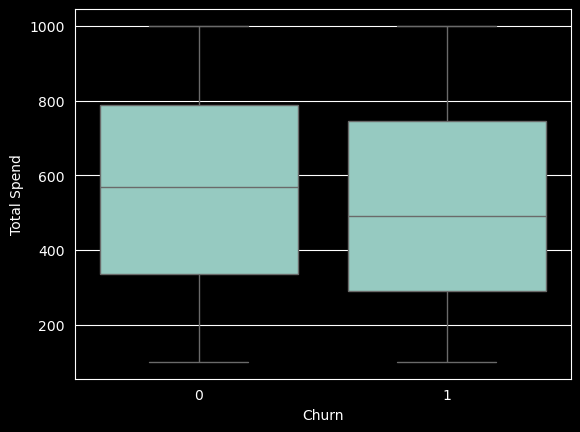

In [64]:
sns.boxplot(x='Churn', y='Total Spend', data=customer_data)

<Axes: xlabel='Age', ylabel='Churn'>

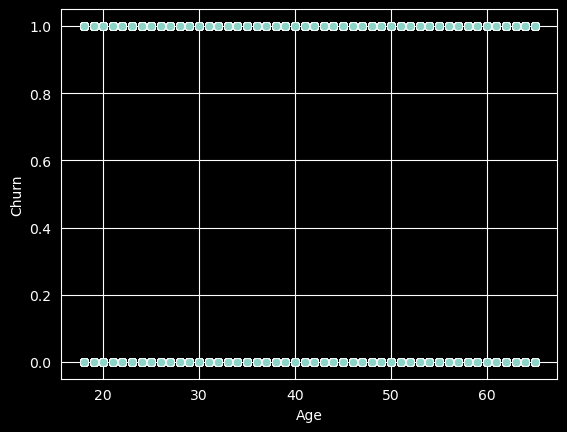

In [65]:
sns.scatterplot(x = customer_data['Age'], y = customer_data['Churn'])

<Axes: xlabel='Support Calls', ylabel='Churn'>

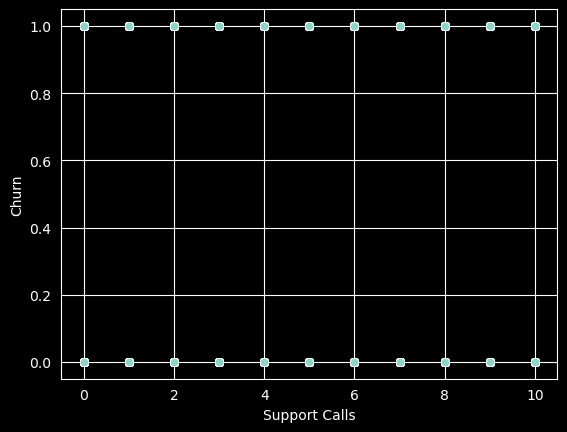

In [66]:
sns.scatterplot(x= customer_data['Support Calls'],y=customer_data['Churn'])

Prepare the data

In [67]:
y = customer_data['Churn']

In [68]:
X = customer_data[['Age','Usage Frequency','Payment Delay','Support Calls','Contract Length','Total Spend','Last Interaction']]
X = pd.get_dummies(X,columns=['Contract Length'],drop_first=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, stratify = y, random_state = 42)

In [70]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape: (51499, 8)
X_test shape : (12875, 8)


Train and Evaluate the Model

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [72]:
classifier = LogisticRegression(max_iter=1000)

cv_scores = cross_val_score(
    classifier,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='accuracy'
)

print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Std: {cv_scores.std():.4f}")

Mean CV accuracy: 0.8052
Std: 0.0047


In [74]:
classifier = LogisticRegression(max_iter=1000, class_weight='balanced')
model = classifier.fit(X_train_scaled, y_train)

In [75]:
y_pred_internal = model.predict(X_test_scaled)
internal_accuracy = model.score(X_test_scaled, y_test)
print(f"Internal Test Accuracy (Scaled): {internal_accuracy:.4f}")

Internal Test Accuracy (Scaled): 0.8047


In [76]:
cm = confusion_matrix(y_test, y_pred_internal)
print(cm)

[[5305 1471]
 [1043 5056]]


Text(0.5, 1.0, 'Confusion Matrix – Test Set Performance')

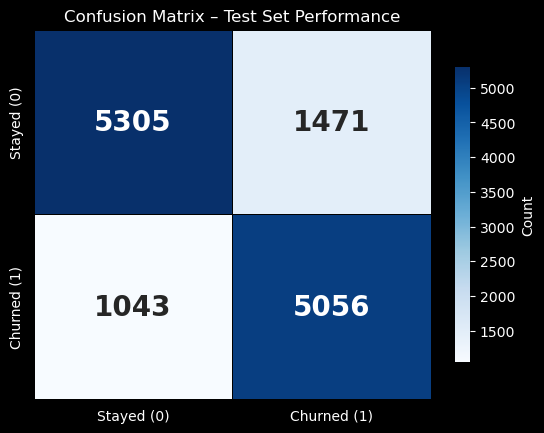

In [77]:
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            linewidths=0.7,
            linecolor='black',
            xticklabels=['Stayed (0)', 'Churned (1)'],
            yticklabels=['Stayed (0)', 'Churned (1)'],
            cbar_kws={'label': 'Count', 'shrink': 0.8},
            annot_kws={'size': 20, 'weight': 'bold'})
plt.title('Confusion Matrix – Test Set Performance')